In [1]:
from numpy import array, pi

from core.policies import LinearPolicy, Policy
from core.systems import Pendulum

m = 0.25; l = 0.5; dt = 1e-2
system = Pendulum(m, l, dt)

class InvertedPendulumPolicy(Policy):
    def __init__(self, pendulum, k_p, k_d):
        self.pendulum = pendulum
        m, g, l = pendulum.m, pendulum.g, pendulum.l
        K = array([[m * l * (g + l * k_p), m * (l ** 2) * k_d]])
        self.linear_policy = LinearPolicy(K)
        self.bias = K[0, 0] * pi
        
    def pi(self, s):
        return self.linear_policy.pi(s) + self.bias
    
k_p = 1; k_d = 2
policy = InvertedPendulumPolicy(system, k_p, k_d)

In [2]:
from numpy import linspace, zeros

f = int(1 / dt)
T = 10
N = T * f
times = linspace(0, T, N + 1)
states = zeros((N + 1, 2))

for step in range(N):
    state = states[step]
    action = policy.pi(state)
    next_state = system.step(state, action)
    states[step + 1] = next_state

In [3]:
from matplotlib.pyplot import figure, show

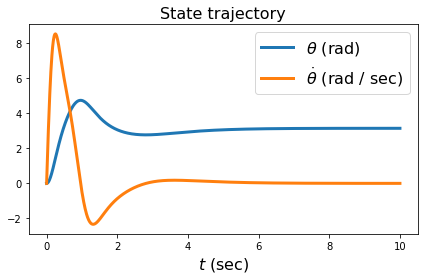

In [4]:
fig = figure(figsize=(6, 4), tight_layout=True)
ax = fig.add_subplot(1, 1, 1)

ax.set_title('State trajectory', fontsize=16)
ax.set_xlabel('$t$ (sec)', fontsize=16)
ax.plot(times, states[:, 0], linewidth=3, label='$\\theta$ (rad)')
ax.plot(times, states[:, 1], linewidth=3, label='$\\dot{\\theta}$ (rad / sec)')
ax.legend(fontsize=16)

show()